# 문제정의
- 버섯의 특징을 사용해서 독 / 식용 버섯을 분류

## 목표
= Decision Tree 과대적합 제어/ 시각화/ 특성 선택

# 데이터 수집

In [64]:
import pandas as pd
data = pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
data.shape

(8124, 23)

# 데이터 전처리

## 결측치

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# 탐색적 데이터 분석

# 모델 선택 및 하이퍼 파라미터 튜닝

In [67]:
X = data.loc[ : , 'cap-shape' : ]
y = data.loc[ :, 'poisonous']

## 인코딩
- 글자 데이터를 수치 데이터로 반환하는 작업

### Label 인코딩

In [68]:
X1 = X.copy()

In [69]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [70]:
X1['cap-shape'] = X1['cap-shape'].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})

### Onehot 인코딩

In [71]:
X2 = X.copy()

In [72]:
# 원핫 인코딩할 컬럼 뽑아서 넣어 주어야 함
X_one_hot = pd.get_dummies(X2)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## 훈련과 평가로 데이터 분리

In [73]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X_one_hot , y,
                                                     test_size = 0.3)

## 모델 불러오기

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# 학습

In [75]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

# 평가

In [76]:
tree_model.score(X_train, y_train)

1.0

In [77]:
tree_model.score(X_test, y_test)

1.0

# 시각화

In [78]:
!pip install graphviz

In [79]:
# 환경 변수
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [80]:
# impurity가 불순도를 표시해주는거
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity=True,
               filled=True)

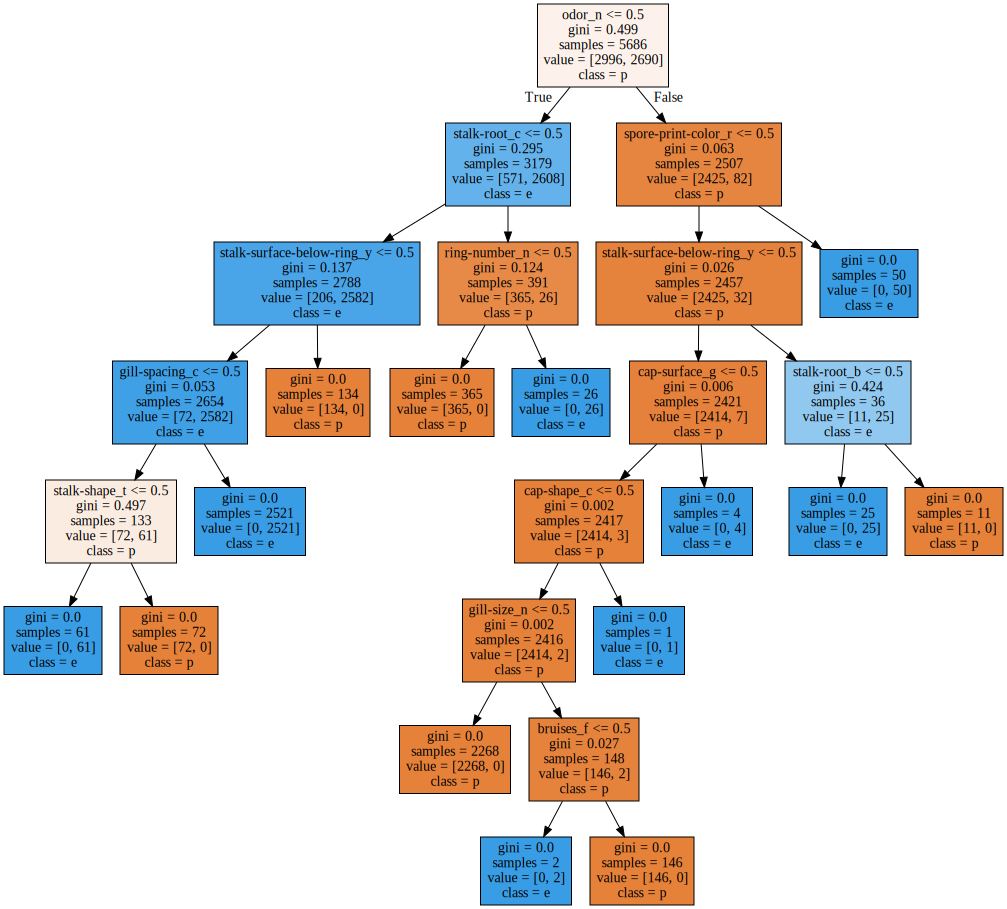

In [81]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [82]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

# 과대적합 제어

## leaf node : 10개로 조정
- 1. leaf node의 수를 10개로 조정한 decisiontree모델 생성
- 2. decisiontree 모델 학습
- 3. decisiontree 모델 평가
- 4. 시각화

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_leaf_nodes = 10)

In [84]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [85]:
tree_model.score(X_train, y_train)

0.9987689060851214

In [86]:
tree_model.score(X_test, y_test)

0.9995898277276456

In [87]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity=True,
               filled=True
               )

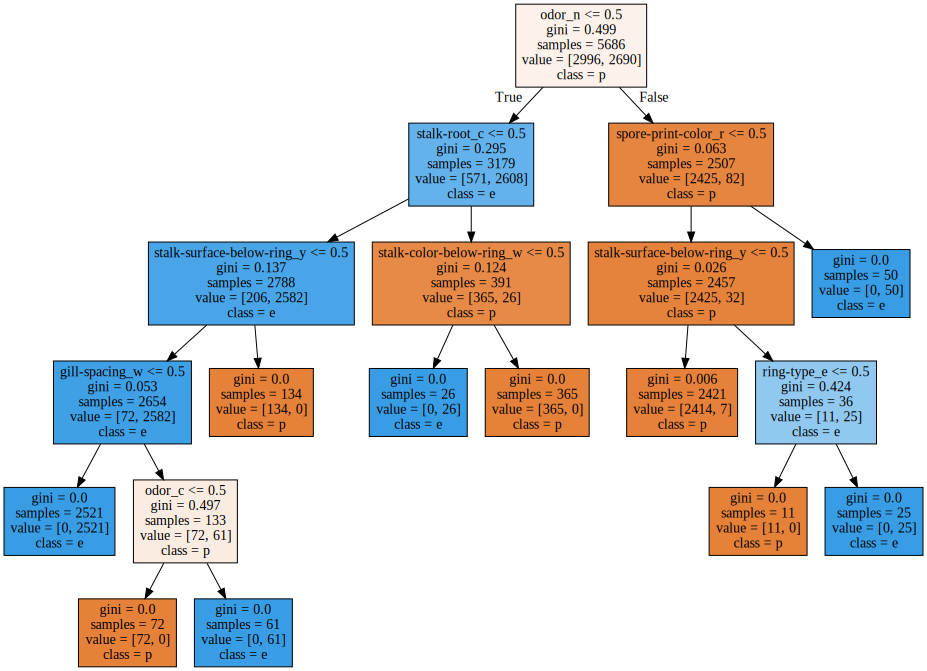

In [88]:
import graphviz

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [89]:
from subprocess import check_call
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

0

# 교차검증

## 그리드 서치

In [106]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {
    'max_depth' : range(1,10),
    'max_leaf_nodes' : range(10,20)
}

In [111]:
# 그리드 서치를 한다면 cv에 의해서
# 교차검증이 되기때문에 교차검증을 할 필요가 없다
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [119]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(10, 20)})

In [120]:
grid.best_score_

0.9998240985048372

In [121]:
grid.best_params_

{'max_depth': 7, 'max_leaf_nodes': 14}

In [93]:
from sklearn.model_selection import cross_val_score
# 사용할 모델, 문제, 정답, 데이터 분할 수
cross_val_score(tree_model, X_train, y_train,cv =  5).mean()

0.9984170411142694

In [105]:
tree = DecisionTreeClassifier(max_depth = 5) # gridsearch 활용
tree.fit(X_train, y_train)
cross_val_score(tree, X_train, y_train, cv = 5).mean()

0.9985927880386983

In [ ]:
# 수치가 높다면 그제서야 test값을 쓴다
tree.score(X_test, y_test)

# 특성 선택

In [95]:
X_train.shape

(5686, 117)

In [96]:
# 특성의 중요도
# 117개의 중요도의 총 합은 1이다
fi = tree_model.feature_importances_

In [103]:
fi_df = pd.DataFrame(fi, index = X_train.columns)
fi_df.sort_values(by = 0, ascending = False).head(10)

,0
odor_n,0.616580
stalk-root_c,0.179657
stalk-surface-below-ring_y,0.097629
spore-print-color_r,0.033845
gill-spacing_w,0.026251
odor_c,0.023414
stalk-color-below-ring_w,0.017209
ring-type_e,0.005416
cap-shape_b,0.000000
stalk-color-below-ring_y,0.000000
